<a href="https://colab.research.google.com/github/Dimas0824/Machine_Learning/blob/main/Jobsheet_11/ML_WEEK11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📱 Praktikum 1
Klasifikasi SVM dengan Data Dummy Linier

In [1]:
!!pip install ipywidgets

['Requirement already satisfied: ipywidgets in /usr/local/lib/python3.12/dist-packages (7.7.1)',
 'Requirement already satisfied: ipykernel>=4.5.1 in /usr/local/lib/python3.12/dist-packages (from ipywidgets) (6.17.1)',
 'Requirement already satisfied: ipython-genutils~=0.2.0 in /usr/local/lib/python3.12/dist-packages (from ipywidgets) (0.2.0)',
 'Requirement already satisfied: traitlets>=4.3.1 in /usr/local/lib/python3.12/dist-packages (from ipywidgets) (5.7.1)',
 'Requirement already satisfied: widgetsnbextension~=3.6.0 in /usr/local/lib/python3.12/dist-packages (from ipywidgets) (3.6.10)',
 'Requirement already satisfied: ipython>=4.0.0 in /usr/local/lib/python3.12/dist-packages (from ipywidgets) (7.34.0)',
 'Requirement already satisfied: jupyterlab-widgets>=1.0.0 in /usr/local/lib/python3.12/dist-packages (from ipywidgets) (3.0.15)',
 'Requirement already satisfied: debugpy>=1.0 in /usr/local/lib/python3.12/dist-packages (from ipykernel>=4.5.1->ipywidgets) (1.8.15)',
 'Requirement 

## Langkah 1 - Import Library

In [2]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

## Langkah 2 - Membuat Data Dummy
Pada praktikum ini, model yang digunakan adalah sebuah model yang sederhana berupa generative model untuk menentukan label pada poin baru. Kasus pada data dummy ini memperlihatkan dua kelas yang telah terpisah.

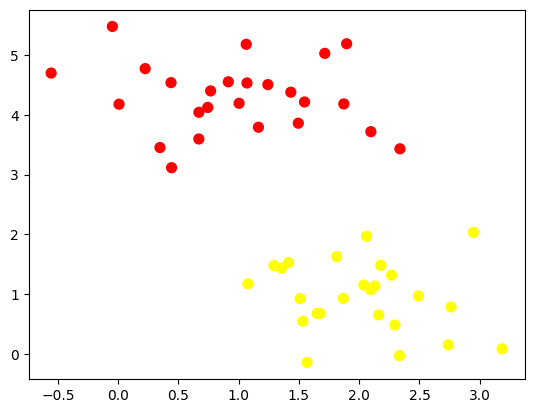

In [3]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

## Langkah 3 - Buat Ilustrasi Garis Pemisah
Untuk membuat sebuah model klasifikasi, garis pemisah data dari dua buah himpunan yang terbentuk diperlukan. Namun, kondisi ini masih menyisakan kasus dimana garis pemisah yang dibutuhkan lebih dari satu garis.

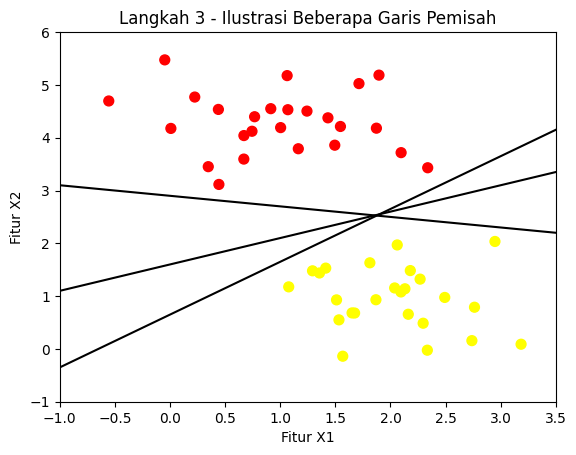

In [4]:
# Asumsikan X dan y sudah ada dari langkah sebelumnya (Langkah 2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

# Buat beberapa garis pemisah (m = slope, b = intercept)
xfit = np.linspace(-1, 3.5)
for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')  # warna hitam

plt.xlim(-1, 3.5)
plt.ylim(-1, 6)
plt.title("Langkah 3 - Ilustrasi Beberapa Garis Pemisah")
plt.xlabel("Fitur X1")
plt.ylabel("Fitur X2")
plt.show()

## Langkah 4 - Ilustrasi Margin
Margin dalam suatu garis juga dapat digunakan untuk memperjelas posisi sebuah data terhadap label.

(-1.0, 3.5)

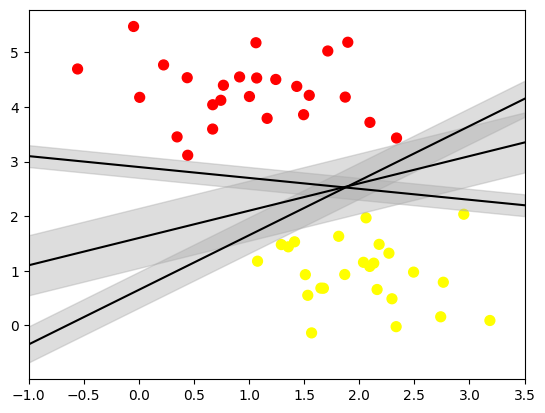

In [5]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

## Langkah 5 - Fitting Model
Selanjutnya, kita akan melakukan pelatihan terhadap model SVM. Model kali ini akan menggunakan fungsi (kernel) dengan jenis linier.

In [6]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

Selanjutnya buat fungsi untuk membantu visualisasi hasil fit model.

In [7]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

Lakukan plotting dengan fungsi yang telah dibuat.

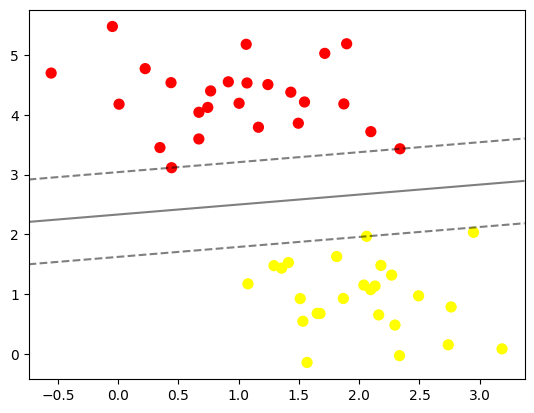

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

Beberapa titik data yang menyentuh (masuk ke area) garis disebut sebagai support vector. Untuk mengetahui data yang masuk ke dalam support vector dapat dilakukan dengan memanggil support_vectors_

model.support_vectors_



In [9]:
# Tampilkan titik data support vector
print("Support vectors:")
print(model.support_vectors_)

Support vectors:
[[0.44359863 3.11530945]
 [2.33812285 3.43116792]
 [2.06156753 1.96918596]]


Hasil fitting merupakan kunci keberhasilan suatu classifier (yang hanya dilihat dari posisi dari support vector). Data-data lain yang berada jauh dari margin dan tetap berada di area yang tepat tidak memiliki kemampuan untuk memodifikasi fitting (karena bukan support vector). Data-data tersebut tidak berkontribusi terhadap loss function yang digunakan untuk fitting model. Untuk lebih memahami hal ini, 60 dan 120 data awal digunakan sebagai contoh dalam bentuk perbandingan.

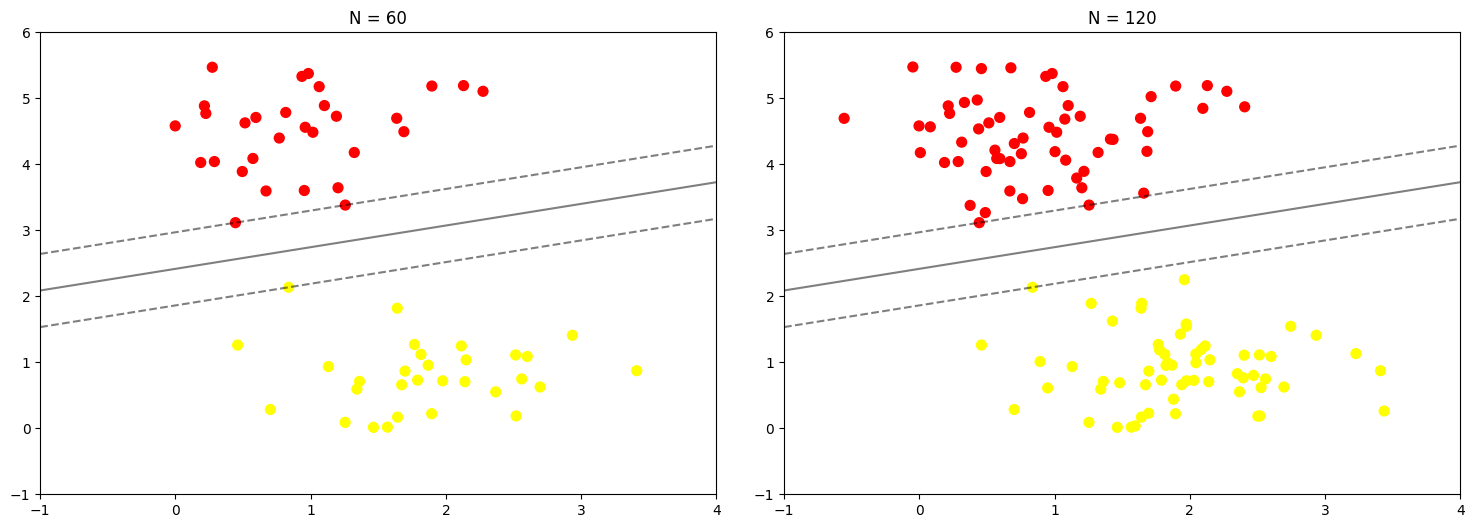

In [10]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

Berdasarkan hasil di atas, perubahan jumlah data tidak mempengaruhi model yang digunakan. Ilustrasi lebih jelas dapat dilihat pada diagram di bawah ini

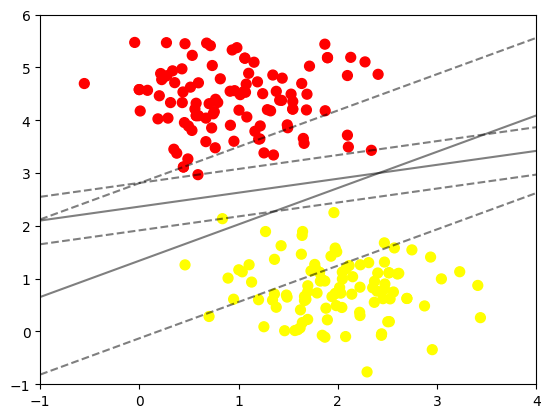

In [11]:
# jumlah data dapat dipilih di antara 10 atau 200 buah data, telihat tidak ada perubahan pada model

from ipywidgets import interact, fixed
# interact(plot_svm, N=[10, 200], ax=fixed(None))

# Karena widget membuat save notebook error di github maka diberikan interactive alternatif dari widgets ini
print(plot_svm(N=10, ax=None))

print(plot_svm(N=200, ax=None))


# 💻 Praktikum 2
Klasifikasi SVM dengan Data Dummy Non-Linier

Pengantar

## Langkah 1 - Ilustrasi Data Non-Linier
Data yang terpisah secara tidak linier menjadi masalah pada model SVM. Oleh karena itu, kernel menjadi sebuah kebutuhan bagi SVM untuk melakukan fitting pada hubungan non-linier dengan sebuah classifier linier.

### Langkah 1a - Import Library

In [12]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.svm import SVC

### Langkah 1b - Buat Kembali Fungsi Plotting



In [13]:
# buat sebuah fungsi untuk menampilkan fitting data
def plot_svc_decision_function(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    X, Y = np.meshgrid(x, y) # rubah ke x, y untuk garis pemisah dari kiri ke kanan
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

### Langkah 1c - Buat Data Dummy Non-Linier

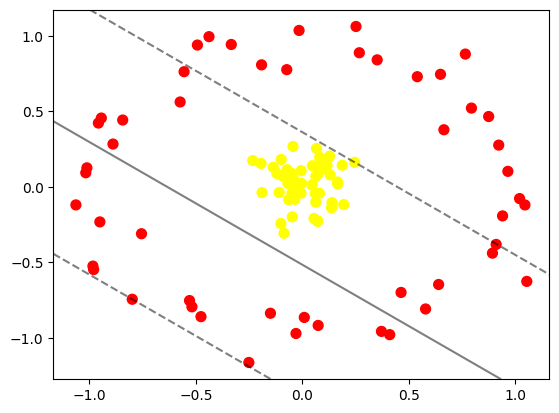

In [14]:
# contoh data tidak terpisah secara linier
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

Berdasarkan contoh data di atas, tidak ditemukan sebuah garis pemisah linier yang mampu berperan sebagai pemisah data. Oleh karena itu, proyeksi (sudut pandang) lain terhadap data diperlukan supaya data dapat terpisahkan dengan jelas. Pada kegiatan ini, proyeksi yang digunakan adalah proyeksi berbasis radial.

r=np.exp(−(X∗∗2).sum(1))

Karena proyeksi radial tidak cukup menggunakan model 2D, maka plot visualisasi diubah menjadi model 3D.

In [15]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

def plot_3D(elev=30, azim=30, X=X, y=y):
    r = np.exp(-(X**2).sum(1))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azip=(-180, 180),
         X=fixed(X), y=fixed(y))

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[-0.47626912, -0.85972784],
       [ 0.87509276,  0.46617807],
       [-0.18935247, -0.03770674],
       [-0.05099501,  0.09051863],
       [ 0.26749026,  0.8886512 ],
       [ 0.64885147,  0.74588974],
       [-0.00352024,  0.02324141],
       [ 0.24564512,  0.16271075],
       [ 0.07341063,  0.13016298],
       [ 0.06647149,  0.25432194],
       [-0.5300307 , -0.75320689],
       [ 0.07128158, -0.22489789],
       [-0.51880088, -0.79464546],
       [ 0.35143065,  0.84163005],
       [ 0.64005125, -0.64669992],
       [ 0.071633  , -0.22864052],
       [-1.06384647, -0.11940503],
       [-0.04891047, -0.04066639],
       [-0.43859282,  0.9952564 ],
       [-0.04391233,  0.26804207],
       [ 0.16571903,  0.01971947],
       [-0.11960334,  0.08979892],
       [ 0.46358661, -0.69937313],
       [-0.07339078,  0.7766401 ],
       [-0.98384697, -0.52488028],
       [-0.57417212,  0.56253354],
       [ 1.05423536, -0.6261315 ],
       [-0.75571442, -0.31041573],
       [ 0.91027156, -0.38122255],
       [-0.19163386,  0.80848769],
       [-0.09218353,  0.07152639],
       [ 0.00900361, -0.86477485],
       [-0.0155287 ,  1.03644794],
       [-0.10897807, -0.03718441],
       [-0.98052356, -0.54783793],
       [-0.06424564, -0.08414082],
       [-0.00613187, -0.04150295],
       [-0.88964626,  0.28383601],
       [ 0.7655553 ,  0.87984831],
       [-0.95128536, -0.23204335],
       [-0.0864838 , -0.30727233],
       [ 0.06937923,  0.13404276],
       [-0.33402259,  0.94347372],
       [ 0.11595705,  0.1441682 ],
       [-0.07138313,  0.11378315],
       [-0.94439639,  0.45612365],
       [ 0.94038628, -0.19228887],
       [ 0.89284145, -0.43914291],
       [-0.1942187 ,  0.15557592],
       [ 0.18721375,  0.14350142],
       [ 0.41032306, -0.97908962],
       [ 0.08183628,  0.19530336],
       [-0.49309278,  0.93969955],
       [ 0.07504114,  0.0902725 ],
       [-0.79911916, -0.74459569],
       [ 0.04734425,  0.14038934],
       [ 0.1307632 ,  0.07917737],
       [-0.95808692,  0.42286119],
       [-0.06760843,  0.02256823],
       [-0.04736281, -0.19870799],
       [-0.03626048, -0.08231596],
       [-1.01739762,  0.0935892 ],
       [-0.05995788,  0.02751095],
       [ 0.12788857,  0.20424247],
       [-0.13679636,  0.12974337],
       [ 0.96532969,  0.10291475],
       [ 1.02036071, -0.07753424],
       [ 0.0605798 , -0.04208884],
       [ 0.10528643,  0.11995474],
       [-0.2331597 ,  0.17424059],
       [ 0.08016089, -0.04191229],
       [ 0.06310707,  0.06923995],
       [-0.03332339,  0.00248352],
       [ 0.1944567 , -0.1170103 ],
       [ 0.5787931 , -0.80883604],
       [-0.25144103, -1.16335823],
       [-0.04077401,  0.04849443],
       [ 0.25194435,  1.06275465],
       [-0.06623746,  0.02533918],
       [ 0.0742016 , -0.91784792],
       [-0.84391021,  0.44293153],
       [ 0.1389032 , -0.10446168],
       [ 0.37147766, -0.95740592],
       [-0.10082716, -0.24198213],
       [-0.09941444,  0.18146411],
       [ 0.92235738,  0.27679463],
       [ 0.04500355,  0.01328364],
       [-0.02996761, -0.97136836],
       [ 0.06298894, -0.10120885],
       [-1.0121768 ,  0.12612037],
       [ 0.66483814,  0.3784938 ],
       [ 0.16538529,  0.03274291],
       [ 0.05497883, -0.20931165],
       [ 0.13704515, -0.13893976],
       [ 1.04548701, -0.11962074],
       [-0.55562765,  0.76305264],
       [-0.1500042 , -0.83716937],
       [ 0.79421675,  0.52204306],
       [-0.00578536,  0.10735802],
       [ 0.53985792,  0.72999533]]), y=array([0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0]))>

## Langkah 2 - Fitting Model
Walaupun data dapat ditampilkan secara terpisah. Proyeksi titik data sejumlah N ke dalan suatu dimensi N menyebabkan beban komputasi juga bertambah. Untuk mengatasi hal ini, kernel radial basis function (RBF) pada Scikit-Learn digunakan.

In [16]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

Plot hasil decision boundaries dari kernel RBF

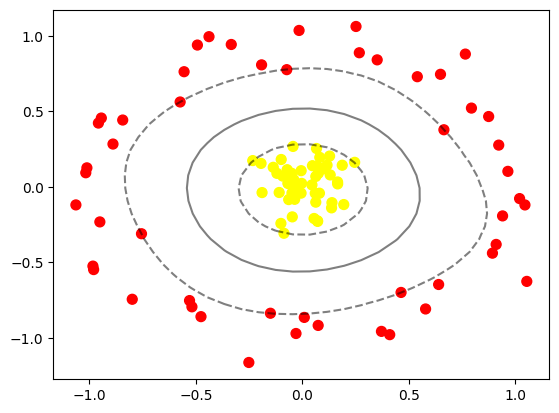

In [17]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

# 🖥️ Praktikum 3
SVM Data Overlapping

## Langkah 1 - Import Library dan Buat Fungsi Plotting

In [18]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

In [19]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

## Langkah 2 - Buat Data Dummy

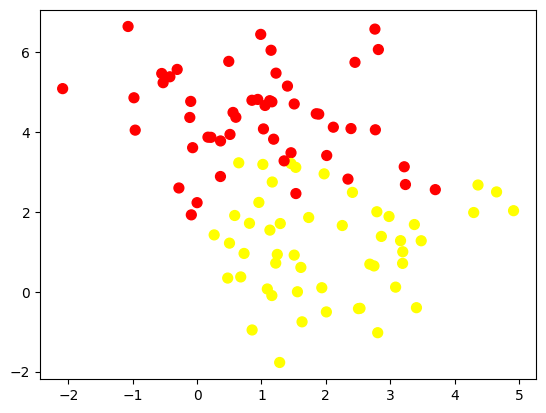

In [20]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

## Langkah 3 - Analisis Dampak Tunning
Untuk mengatasi hal ini, teknik penghalusan margin pada SVM dapat diterapkan. Teknik ini berfungsi untuk memasukkan beberapa titik data ke dalam margin supaya menghasilkan fitting yang lebih baik. Penebalan margin dari hasil teknik penghalusan dikelola oleh sebuah parameter tuning (dikenal sebagai C). Contoh dibawah menunjukkan perubahan pada C berdampak pada hasil fitting final.

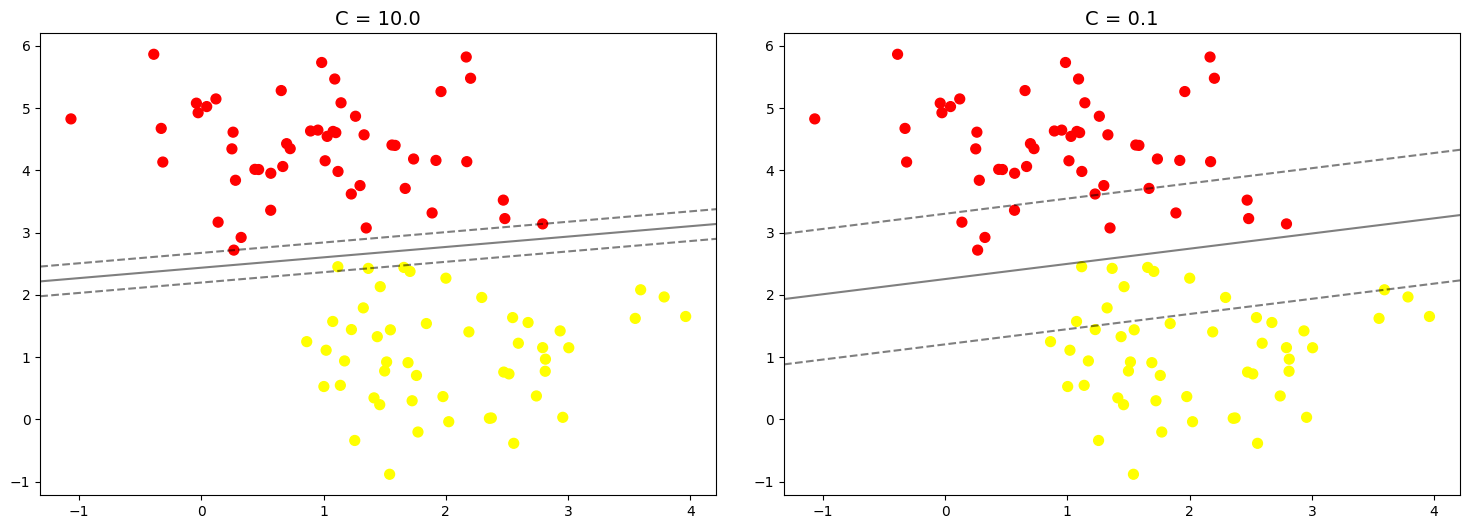

In [21]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

# 🖼️ Praktikum 4
Klasifikasi Citra Wajah

## Langkah 0 - Unduh Dataset
Dataset yang digunakan dapat diunduh secara langsung melalui scikit-learn.

In [22]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(len(faces.target_names))
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
8
(1348, 62, 47)


## Langkah 1 - Inspeksi Citra Wajah
Lakukan inspeksi citra wajah yang akan digunakan

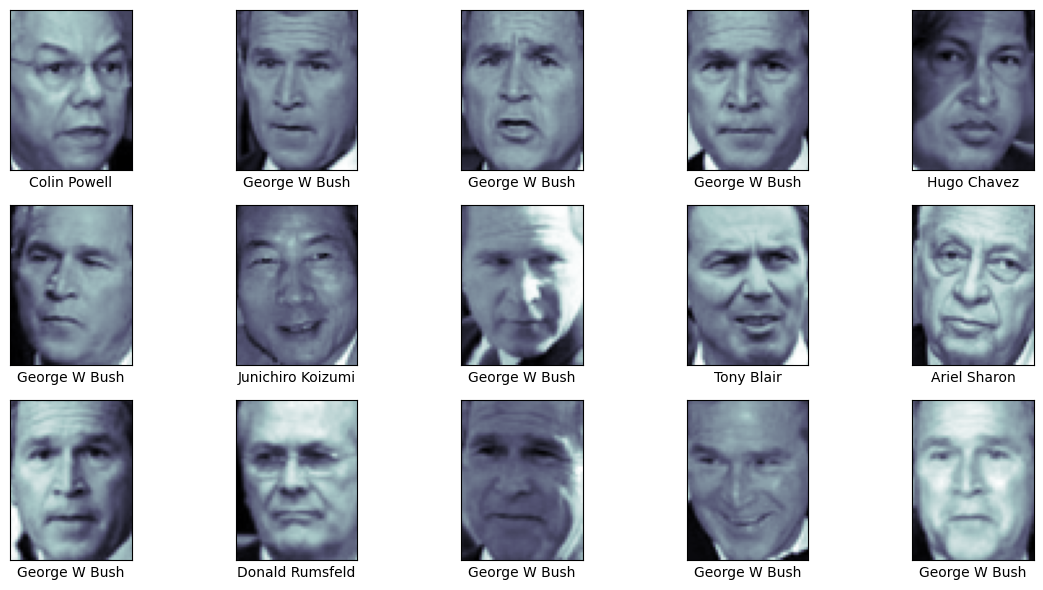

In [23]:
# contoh wajah yang digunakan
from matplotlib import pyplot as plt

# atur ukuran figure lebih lebar
fig, ax = plt.subplots(3, 5, figsize=(12, 6))

for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

plt.tight_layout()
plt.show()

## Langkah 2 - Pra Pengolahan Data
Pada tahap ini, kita akan mencoba melakukan proses pra pengolahan data sederhana dengan menggunakan Principal Component Analysis (PCA). PCA akan memproyeksikan fitur dengan rosolusi tinggi (banyak dimensi) ke dalam principal component atau fitur yang dianggap penting saja. Metode PCA sering juga disebut sebagai metode reduksi dimensi.

In [24]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')

# Pipeline digunakan untuk melakukan proses secara bertahap dalam
# 1 eksekusi fungsi secara langsung
model = make_pipeline(pca, svc)

## Langkah 3 - Split Data

In [25]:
# pemisahan data training dan data testing

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

## Langkah 4 - Pembuatan Model + Tunning
Pada langkah ini, kita akan mensimulasikan pembuatan model dan hyperparameter tunning secara langsung untuk mendapatkan nilai hyperparameter yang terbaik. Nilai tersebut dapat dicapai salah satunya dengan menggunakan teknik GridSearch. GridSearch akan mencoba menjadi kombinasi hyperparameter terbaik dengan cara melakukan pengujian performansinya satu per satu. Cara ini mudah akan tetapi memakan waktu yang lama dan komputasi yang cukup tinggi.

In [26]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)
print(grid.best_score_)

CPU times: user 2min 3s, sys: 904 ms, total: 2min 4s
Wall time: 1min 40s
{'svc__C': 5, 'svc__gamma': 0.001}
0.828893332683022


Sehingga didapatkan informasi bahwa, hyperparameter terbaik dari model SVM yang kita buat adalah dengan, C=5 dan Gamma=0.001 dengan tingkat akurasi 82.88%.

Gunakan model terbaik tersebut untuk proses prediksi.

In [27]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

## Langkah 5 - Cek Hasil Prediksi
Cek hasil prediksi pada citra.

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

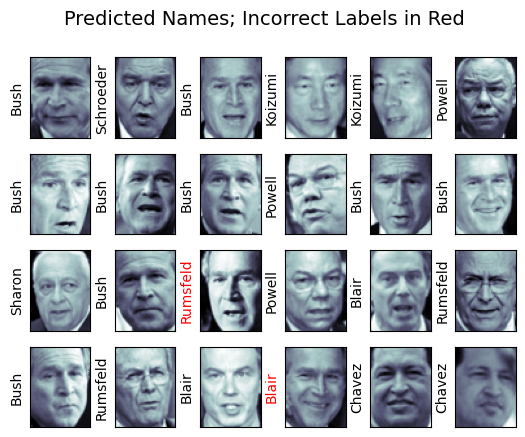

In [28]:
# hasil label pada data testing

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

Contoh di atas hanya menunjukkan satu data dengan label salah. Selanjutnya, kita akan mengukur performa model dengan classification report dan confusion matrix.



## Langkah 6 - Cek Performansi
Pertama, cek performansi dengan classification_report dari sklearn.

In [29]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



Dari tabel tersebut, kita mendapatkan informasi terkait dengan akurasi keseluruhan, presisi, recall, dan f1-score untuk setiap label.

Selanjutnya, kita dapat menggunakan confusion matrix untuk mengetahui label label yang terklasifikasi  dengan benar dan tidak.

Text(113.92222222222219, 0.5, 'predicted label')

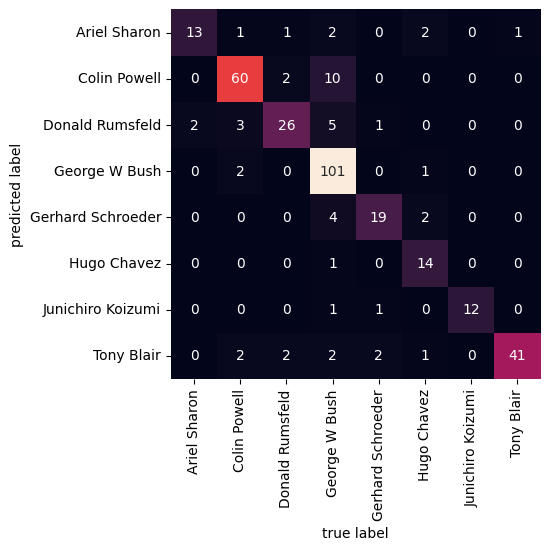

In [30]:
# bentuk confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

# 🌃 Praktikum 5
Klasifikasi Citra Siang dan Malang

## Langkah 0 - Import Library

In [42]:
# Import Required Libraries
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd

Lakukan ekstraksi data gambar, kemudian definisikan lokasi gambar. Pada contoh ini, folder gambar berlokasi sama dengan lokasi file python.




In [44]:
# Image directories
train_dir = "/content/drive/MyDrive/Machine Learning/DATASET/images/training/"
test_dir = "/content/drive/MyDrive/Machine Learning/DATASET/images/test/"

## Langkah 1 - Load Data dan Visualisasikan
Buatlah fungsi untuk membuat daftar seluruh path dari gambar.

In [45]:
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)

            if not img is None:
                img_list.append((img, label))

    return img_list

Load gambar training




In [46]:
# Load training data
train_img = load_dataset(train_dir)

Lakukan pengecekan pada salah satu data pada list. List harus berisi tuple dengan dua data, yaitu data gambar dan label dari gambar.

In [47]:
# Check the first data
# It should be a tuple consist of arrays of image and image labels
train_img[0]

(array([[[149, 162, 179],
         [146, 159, 176],
         [144, 157, 174],
         ...,
         [254, 250, 247],
         [255, 252, 249],
         [255, 254, 251]],
 
        [[152, 165, 182],
         [149, 162, 179],
         [146, 159, 176],
         ...,
         [255, 254, 250],
         [255, 252, 249],
         [251, 250, 246]],
 
        [[139, 155, 171],
         [137, 153, 169],
         [134, 150, 166],
         ...,
         [248, 248, 246],
         [255, 255, 253],
         [255, 255, 253]],
 
        ...,
 
        [[102,  88,  77],
         [100,  86,  75],
         [ 98,  84,  73],
         ...,
         [ 73,  71,  74],
         [ 73,  71,  74],
         [ 72,  70,  73]],
 
        [[102,  88,  77],
         [100,  86,  75],
         [ 99,  85,  74],
         ...,
         [ 73,  71,  74],
         [ 73,  71,  74],
         [ 72,  70,  73]],
 
        [[102,  88,  77],
         [100,  86,  75],
         [ 99,  85,  74],
         ...,
         [ 74,  72,  75],
  

Cek ukuran gambar secara acak




In [48]:
# Random size checking
pick_random = np.random.randint(0, len(train_img))

# Check img size
print(f'Image {pick_random}')
print(train_img[pick_random][0].shape)

Image 95
(737, 1024, 3)


Tampilkan gambar untuk inspeksi secara visual. Buatlah fungsi untuk membantu memvisualkan gambar




In [49]:
# Function to Visualize
def random_img_viz(img_list):
    rand_num = np.random.randint(0, len(img_list))

    img = img_list[rand_num][0]
    label = img_list[rand_num][1]
    label_str = 'day' if label == 1 else 'night'

    plt.imshow(img)
    print(f'Shape\t: {img.shape}')
    print(f'Label\t: {label}')

Lakukan visualisasi gambar secara acak


Jika fungsi visualisasi berjalan dengan benar, maka akan muncul tampilan seperti berikut,



Shape	: (471, 640, 3)
Label	: day


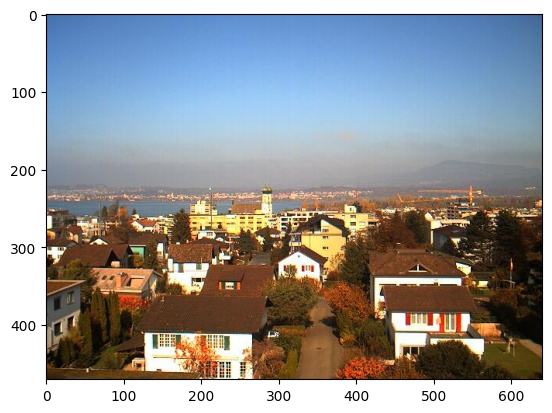

In [50]:
random_img_viz(train_img)

## Langkah 3 - Pra Pengolahan Data
Pada tahap ini, kita akan melakukan dua proses utama, yaitu standardisasi ukuran gambar, dan encoding label gambar.

Bualah fungsi berikut untuk menstandarkan ukuran gambar.

In [51]:
def standarized_input(image):
    # resize to w: 1100, h:600
    std_img = cv2.resize(image, (1100,600))

    return std_img

Selanjutnya, buatlah fungsi untuk kebutuhan encoding label.

In [52]:
def label_encoder(label):
    # Encode the label
    # day as 1; night as 0
    num_val = 0

    if(label == 'day'):
        num_val = 1

    return num_val

Terakhir, buatlah fungsi untuk melakukan kedua hal tersebut secara sekaligus untuk semua gambar dalam list.

In [53]:
def preprocess(img_list):
    std_img_list = []

    for item in img_list:
        image = item[0]
        label = item[1]

        # Standarized the image
        std_img = standarized_input(image)

        # Create the label
        img_label = label_encoder(label)

        std_img_list.append((std_img, img_label))

    return std_img_list

Lakukan pra pengolahan data pada data training.




In [54]:
train_std_img_list = preprocess(train_img)

Lakukan pengecekan ukuran gambar secara acak.

In [55]:
# Random size checking
pick_random = np.random.randint(0, len(train_std_img_list))

# Check img size
print(f'Image {pick_random}')
print(train_std_img_list[pick_random][0].shape)

Image 167
(600, 1100, 3)


**WARNING!** Perhatikan ukuran (shape) dari data image. Atribut shape akan menampilkan dalam konteks baris (height) x kolom (width)

Lakukan inspeksi visual dengan fungsi random_img_viz yang telah dibuat sebelumnya pada gambar hasil pra pengolahan.

Hasilnya akan seperti gambar berikut,

Shape	: (600, 1100, 3)
Label	: 1


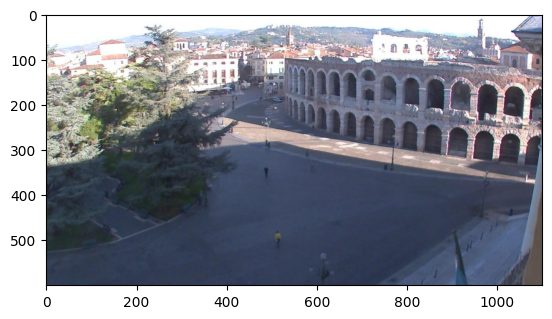

In [56]:
random_img_viz(train_std_img_list)

## Langkah 4 - Ekstraksi Fitur
Selanjutnya, untuk dapat membadakan antara label satu dengan label yang lain, kita memerlukan sebuah fitur. Fitur adalah penciri dari sebuah data yang dapat digunakan untuk membendakan data satu dengan yang lain. Pada percobaan kali ini, kita akan menggunakan fitur yang sederhana yaitu nilai rata-rata dari tingkat kecerahan gambar (average brightness). Namun sebelum dapat melakukan hal tersebut, kita akan mengubah ruang warna (colorspace) dari RGB menjadi HSV (Hue, Saturation, Value). Hal ini dikarenakan, tingkat kecerahan (brightness) lebih mudah didapatkan dari HSV berdasarkan nilai Valuenya.

Buatlah fungsi berikut untuk mendapatkan nilai rata-rata tingkat kecerahan.

In [57]:
# Get feature based on average brightness using HSV colorspace
def avg_brightness(image):
    # Convert image to HSV
    img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Calculate the avg of brightness
    sum_brightness = np.sum(img_hsv[:,:,2]) # take the 3rb value which is the V channel
    area = image.shape[0] * image.shape[1]
    avg = sum_brightness / area

    return avg

Lakukan pengecekan pada gambar secara acak. **INGAT! Gunakan gambar yang telah melalui proses pra pengolahan data!**

Image 130
Avg Brighness: 114.3161


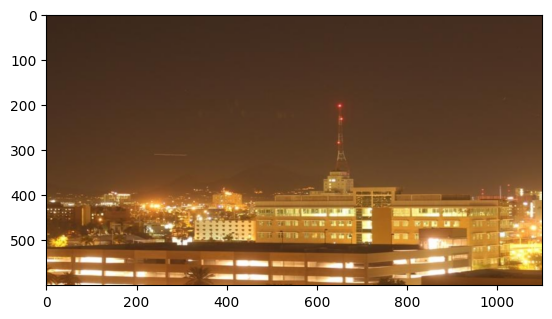

In [58]:
# Check on random image
rand_img = np.random.randint(0, len(train_std_img_list))

feature_img = train_std_img_list[rand_img][0]

avg_img = avg_brightness(feature_img)

print(f'Image {rand_img}')
print(f'Avg Brighness: {avg_img:.4f}')
plt.imshow(feature_img)

## Langkah 5 - Klasifikasi dengan Metode Threshold
Pada tahap ini, kita akan melakukan proses klasifikasi sederhana dengan menggunakan nilai ambang batas (threshold) dari nilai rata-rata kecerahan yang kita tentukan sendiri.

Buatlah fungsi berikut,

In [59]:
def predict_label(img, threshold):
    # Computer average brightness
    avg = avg_brightness(img)
    pred = 0

    # Predict the label based on user defined threshold
    if avg > threshold:
        pred = 1

    return pred

Lakukan pengecekan prediksi secara acak pada data training




Image 159
Actual label: 0
Predicted label: 0


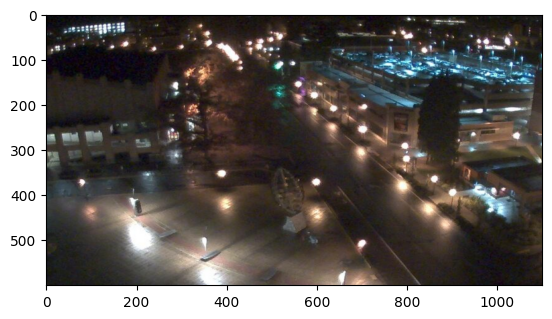

In [60]:
# Test the classifier on train data
rand_img = np.random.randint(0, len(train_std_img_list))

pred = predict_label(train_std_img_list[rand_img][0], threshold=120)

# Evaluate
print(f'Image {rand_img}')
print(f'Actual label: {train_std_img_list[rand_img][1]}')
print(f'Predicted label: {pred}')
plt.imshow(train_std_img_list[rand_img][0])

## Langkah 6 - Evaluasi Manual
Selanjutnya kita akan membuat fungsi evaluasi model sederhana, yaitu dengan membandingkan label yang diprediksi benar dengan seluruh data. Ingat kembali konsep confussion matrix.

Buatlah fungsi berikut,

In [61]:
def evaluate(img_list, threshold):
    miss_labels = []

    for file in img_list:
        # Get the ground truth / correct label
        img = file[0]
        label = file[1]

        # Get prediction
        pred_label = predict_label(img, threshold)

        # Compare ground truth and pred
        if pred_label != label:
            miss_labels.append((img, pred_label, label))

    total_img = len(img_list)
    corr_pred = total_img - len(miss_labels)
    accuracy = corr_pred / total_img

    print(f'Accuracy: {accuracy:.4f}')

Lakukan evaluasi pada data training dengan nilai ambang batas 120.




In [62]:
# Evaluate on train data
evaluate(train_std_img_list, threshold=120)

Accuracy: 0.8417


Anda dapat mengubah nilai ambang batas dan amati hasilnya.

Selanjutnya, kita akan melakukan evaluasi pada data testing. Namun sebelumnya, data testing harus diperlakukan sama dengan data training dalam konteks pra progolahan data dan ekstraksi fitur.

In [63]:
# Evaluate on test data

# Load test data
test_img = load_dataset(test_dir)

# Preprocess
test_std_img_list = preprocess(test_img)

# Predict
evaluate(test_std_img_list, threshold=120)

Accuracy: 0.8688


## Klasifikasi dengan SVM
Sebelumnya, kita hanya menggunakan threshold sebagai acuan. Cara ini mungkin tidak efektif dikarenakan kita harus menentukan threshold dengan tepat. Oleh karena itu, selanjutnya kita akan mencoba menggunakan model SVM untuk proses klasifikasi. Seluruh langkah yang digunakan serupa, kita hanya mengubah mulai langkah ke-4.

## Langkah 4 Alternatif - Membuat Feature Vectors.
Perbedaan mendasar dari langkah 4 sebelumnya adalah, kita akan melakukan tabulasi semua nilai rata-rata kecerahan pada data, dan menyimpannya dalam bentuk tabel. Dalam konteks ini, kita akan membuat tabel dengan kolom fitur dan label.

Buatlah fungsi berikut,

In [64]:
# Create function to extract feature for every images and stored in tabular data
# Stored in Pandas dataframe
def extract_avg_bright_feature(img_list):
    avg_list = []
    labels = []

    for img in img_list:
        img_avg = avg_brightness(img[0]) # Get the avg brightness from image
        img_label = img[1] # Get the image label

        avg_list.append(img_avg)
        labels.append(img_label)

    # Stack data in columcular way
    data = np.column_stack((avg_list, labels))
    # Create a Pandas dataframe
    df = pd.DataFrame(data, columns=['AVG_BRIGHT', 'LABELS'])

    return df

Cek hasilnya pada data training,




In [65]:
# Extract feature on train data
train_avg_img = extract_avg_bright_feature(train_std_img_list)
print(f'Shape: {train_avg_img.shape}')
train_avg_img.head()

Shape: (240, 2)


,AVG_BRIGHT,LABELS
0,107.579145,1.0
1,143.364305,1.0
2,160.245648,1.0
3,131.771191,1.0
4,197.451662,1.0


Lakukan langkah yang serupa pada data testing

In [66]:
# Do the same thing on test data
test_avg_img = extract_avg_bright_feature(test_std_img_list)
print(f'Shape: {test_avg_img.shape}')
test_avg_img.head()

Shape: (160, 2)


,AVG_BRIGHT,LABELS
0,201.607444,1.0
1,150.341579,1.0
2,158.883767,1.0
3,157.650256,1.0
4,129.381088,1.0


## Langkah 5 - Buat Model SVM
Selanjutnya, kita akan membuat model SVM dengan kernel RBF (default) dengan memanfaatkan libary scikit-learn.

In [67]:
# import requied library
from sklearn.svm import SVC

# Split data and label
X_train = train_avg_img.iloc[:,0].values.reshape(-1,1)
y_train = train_avg_img.iloc[:,1]
X_test = test_avg_img.iloc[:,0].values.reshape(-1,1)
y_test = test_avg_img.iloc[:,1]

model = SVC()
model.fit(X_train, y_train)

SVC()

## Langkah 6 - Evaluasi
Selanjutnya, kita akan melakukan evaluasi pada data training dan testing dengan bantuan library scikit-learn.

In [68]:
from sklearn.metrics import accuracy_score

# Make a prediction on train data
y_train_pred = model.predict(X_train)

# Get the accuracy on train data
acc_train = accuracy_score(y_train, y_train_pred)

# Make a prediction on test data
y_test_pred = model.predict(X_test)

# Get the accuracy on test data
acc_test = accuracy_score(y_test, y_test_pred)

# Print Eval Result
print(f'Accuracy on train: {acc_train}')
print(f'Accuracy on test: {acc_test}')

Accuracy on train: 0.8583333333333333
Accuracy on test: 0.9


# 📶 Tugas Praktikum

## 1. Buatlah model SVM dengan menggunakan data voice.csv dengan ketentuan,

### a. Split data dengan rasio 70:30 dan 80:20 untuk setiap model yang akan dibangun.

#### Langkah 1: Import dan Load Dataset

In [69]:
# Import dan Load data
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Machine Learning/DATASET/voice.csv')
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


#### Langkah 2: Persiapan Data

In [70]:
# Persiapan data
# Encode label (kolom label biasanya bernama 'label' dengan nilai 'male'/'female')
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

# Pisahkan fitur dan target
X = df.drop('label', axis=1)
y = df['label']

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### Langkah 3: Fungsi untuk Evaluasi Model

In [71]:
def evaluate_svm(kernel_type, test_size):
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=test_size, random_state=42
    )

    model = SVC(kernel=kernel_type)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    return acc


#### Langkahh 4: Uji Semua Kombinasi

    i. Gunakan model dengan kernel linier.

    ii. Gunakan model dengan kernel polynomial.

    iii. Gunakan model dengan kernel RBF.

Tabulasikan performansi setiap split dan kernel berdasarkan metrik akurasi.

In [72]:
from tabulate import tabulate

results = []

for test_ratio in [0.3, 0.2]:
    for kernel in ['linear', 'poly', 'rbf']:
        acc = evaluate_svm(kernel, test_ratio)
        results.append({
            'Test Size': f"{int(test_ratio*100)}%",
            'Kernel': kernel,
            'Accuracy': round(acc, 4)
        })

# Buat DataFrame
results_df = pd.DataFrame(results)

# Cetak tabel dengan tabulate
print(tabulate(results_df, headers='keys', tablefmt='grid', showindex=False))

+-------------+----------+------------+
| Test Size   | Kernel   |   Accuracy |
+=============+==========+============+
| 30%         | linear   |     0.9706 |
+-------------+----------+------------+
| 30%         | poly     |     0.9569 |
+-------------+----------+------------+
| 30%         | rbf      |     0.9811 |
+-------------+----------+------------+
| 20%         | linear   |     0.9763 |
+-------------+----------+------------+
| 20%         | poly     |     0.9685 |
+-------------+----------+------------+
| 20%         | rbf      |     0.9826 |
+-------------+----------+------------+


## 2. Gunakan data pada praktikum 5 untuk membuat model klasifikasi siang dan malam menggunakan SVM dengan kernel RBF menggunakan fitur histrogram. Gunakan rasio 80:20. Anda dapat bereksperimen dengan hyperparameter tunning dari kernel RBF. Catat performansi akurasinya!



## Langkah 0: Import dan Load Dataset

In [73]:
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Load Dataset
train_dir = "/content/drive/MyDrive/Machine Learning/DATASET/images/training/"
test_dir  = "/content/drive/MyDrive/Machine Learning/DATASET/images/test/"

def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')  # day dan night folder
    img_list = []

    for dir in dirs:
        label = str(dir).split('/')[-1]  # nama folder (day / night)
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)
            if img is not None:
                img_list.append((img, label))
    return img_list

train_img = load_dataset(train_dir)
test_img  = load_dataset(test_dir)

print(f"Jumlah data training: {len(train_img)}")
print(f"Jumlah data testing : {len(test_img)}")


Jumlah data training: 240
Jumlah data testing : 160


### Langkah 1: Preprocessing (Standarisasi Ukuran & Label Encoding)

In [74]:
def standarized_input(image):
    # resize ke ukuran seragam (misal 1100x600)
    return cv2.resize(image, (1100, 600))

def label_encoder(label):
    # Encode: day = 1, night = 0
    return 1 if label == 'day' else 0

def preprocess(img_list):
    std_img_list = []
    for image, label in img_list:
        std_img = standarized_input(image)
        lbl = label_encoder(label)
        std_img_list.append((std_img, lbl))
    return std_img_list

train_std_img_list = preprocess(train_img)
test_std_img_list  = preprocess(test_img)

print(f"Contoh shape gambar: {train_std_img_list[0][0].shape}")


Contoh shape gambar: (600, 1100, 3)


### Langkah 2: Ekstraksi Fitur Histogram

In [75]:
def extract_histogram(image):
    # Convert RGB → BGR jika perlu
    img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Hitung histogram per channel
    hist_r = cv2.calcHist([img_rgb], [0], None, [16], [0, 256])
    hist_g = cv2.calcHist([img_rgb], [1], None, [16], [0, 256])
    hist_b = cv2.calcHist([img_rgb], [2], None, [16], [0, 256])

    # Normalisasi dan gabungkan
    hist_r = cv2.normalize(hist_r, hist_r).flatten()
    hist_g = cv2.normalize(hist_g, hist_g).flatten()
    hist_b = cv2.normalize(hist_b, hist_b).flatten()

    return np.concatenate([hist_r, hist_g, hist_b])

# Ekstrak fitur
def create_feature_dataset(img_list):
    features, labels = [], []
    for image, label in img_list:
        hist = extract_histogram(image)
        features.append(hist)
        labels.append(label)
    return np.array(features), np.array(labels)

X_train, y_train = create_feature_dataset(train_std_img_list)
X_test,  y_test  = create_feature_dataset(test_std_img_list)

print(f"Shape fitur training: {X_train.shape}")


Shape fitur training: (240, 48)


## Langkah 3: Model SVM Kernel RBF

In [76]:
model_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')
model_rbf.fit(X_train, y_train)

# Prediksi dan akurasi
y_pred_train = model_rbf.predict(X_train)
y_pred_test  = model_rbf.predict(X_test)

acc_train = accuracy_score(y_train, y_pred_train)
acc_test  = accuracy_score(y_test, y_pred_test)

print(f"Akurasi Training : {acc_train:.4f}")
print(f"Akurasi Testing  : {acc_test:.4f}")


Akurasi Training : 1.0000
Akurasi Testing  : 0.9688


## Langkah 4: Hyperparameter tuning menggunakan Optuna Search

    - Optuna dapat digunakan untuk mencari parameter seperti c, gamma, dan bahkan mencari kernel optimal.
    - Mengoptimalkan metrik (misalnya akurasi validasi) dengan lebih cepat dan cerdas lewat algoritma Bayesian Optimization.

In [77]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 11.7 MB/s eta 0:00:00


### Langkah 1: Membuat Objective Pencarian Hyperparameter

In [78]:
import optuna
from sklearn.model_selection import cross_val_score

# Fungsi objektif untuk Optuna
def objective(trial):
    # Parameter yang akan dioptimasi
    C = trial.suggest_float('C', 1e-5, 1e5, log=True)
    gamma = trial.suggest_float('gamma', 1e-5, 1e5, log=True)

    # Model SVM
    model = SVC(kernel='rbf', C=C, gamma=gamma)

    # Evaluasi model dengan cross-validation (5-fold)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

    # Simpan hasil trial ke dataframe global
    trial.set_user_attr("mean_accuracy", scores.mean())

    return scores.mean()

## Langkah 2: Menjalankan Optimasi

In [79]:
import optuna
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from tabulate import tabulate
import warnings
from optuna.logging import set_verbosity, WARNING as OPTUNA_WARNING

warnings.filterwarnings("ignore", category=FutureWarning)
set_verbosity(OPTUNA_WARNING)

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=250, n_jobs=-1)

best = study.best_trial

print("=== OPTUNA OPTIMIZATION SUMMARY ===")
print(f"Best Trial     : {best.number}")
print(f"C Value        : {best.params['C']:.6f}")
print(f"Gamma Value    : {best.params['gamma']:.6f}")
print(f"Best Accuracy  : {best.value:.4f}\n")

df = pd.DataFrame([
    {
        "Trial": t.number,
        "C": round(t.params["C"], 6),
        "Gamma": round(t.params["gamma"], 6),
        "Accuracy (CV)": round(t.user_attrs["mean_accuracy"], 4),
        "Status": t.state.name
    }
    for t in study.trials
])

df = df.sort_values(by="Accuracy (CV)", ascending=False).head(10)
print("Top 10 Trials (sorted by Accuracy)")
print(tabulate(df, headers="keys", tablefmt="psql", showindex=False))

=== OPTUNA OPTIMIZATION SUMMARY ===
Best Trial     : 1
C Value        : 987.634587
Gamma Value    : 0.160692
Best Accuracy  : 1.0000

Top 10 Trials (sorted by Accuracy)
+---------+----------+----------+-----------------+----------+
|   Trial |        C |    Gamma |   Accuracy (CV) | Status   |
|---------+----------+----------+-----------------+----------|
|       1 |  987.635 | 0.160692 |               1 | COMPLETE |
|      11 |  457.4   | 0.423798 |               1 | COMPLETE |
|      19 | 3642.67  | 0.066831 |               1 | COMPLETE |
|      22 |  356.111 | 0.381129 |               1 | COMPLETE |
|      13 |  938.782 | 0.163064 |               1 | COMPLETE |
|      23 |  326.888 | 0.200302 |               1 | COMPLETE |
|      48 | 3225.08  | 0.109895 |               1 | COMPLETE |
|      52 |  366.245 | 0.312178 |               1 | COMPLETE |
|      36 | 8609.01  | 0.038436 |               1 | COMPLETE |
|      32 | 1426.75  | 0.086199 |               1 | COMPLETE |
+---------+-

## Langkah 3: Memilih Best Model dan Evaluasi Train/Test

In [80]:
best = study.best_trial

# Latih ulang model dengan parameter terbaik
best_model = SVC(kernel="rbf", C=best.params["C"], gamma=best.params["gamma"])
best_model.fit(X_train, y_train)

# Evaluasi di train dan test set
train_acc = accuracy_score(y_train, best_model.predict(X_train))
test_acc = accuracy_score(y_test, best_model.predict(X_test))

## Langkah 4: Tampilkan hasil Best Model

In [81]:
print("="*80)
print("OPTUNA OPTIMIZATION SUMMARY".center(80))
print("="*80)
print(f"Best Trial     : {best.number}")
print(f"C Value        : {best.params['C']:.6f}")
print(f"Gamma Value    : {best.params['gamma']:.6f}")
print(f"CV Accuracy    : {best.value:.4f}")
print(f"Train Accuracy : {train_acc:.4f}")
print(f"Test Accuracy  : {test_acc:.4f}")
print("="*80)

                          OPTUNA OPTIMIZATION SUMMARY                           
Best Trial     : 1
C Value        : 987.634587
Gamma Value    : 0.160692
CV Accuracy    : 1.0000
Train Accuracy : 1.0000
Test Accuracy  : 0.9750


## Langkah 5: Cek Performansi Best Model

In [82]:
from sklearn.metrics import classification_report, confusion_matrix

# Prediksi pada test set
y_pred = best_model.predict(X_test)

# Precision, Recall, F1-score per label
print("Classification Report:")
print(classification_report(y_test, y_pred, digits=4))

Classification Report:
              precision    recall  f1-score   support

           0     0.9750    0.9750    0.9750        80
           1     0.9750    0.9750    0.9750        80

    accuracy                         0.9750       160
   macro avg     0.9750    0.9750    0.9750       160
weighted avg     0.9750    0.9750    0.9750       160



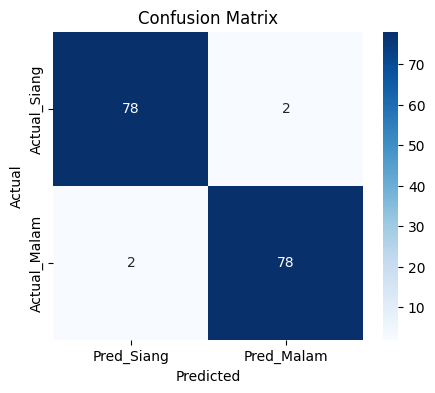

In [83]:
# Buat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi dengan heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Pred_Siang", "Pred_Malam"],
            yticklabels=["Actual_Siang", "Actual_Malam"])
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

Berdasarkan evaluasi model terbaik hasil tuning Optuna dengan pendekatan Bayesian, diperoleh akurasi yang sangat tinggi yakni 0,975 atau 97,5%. Pada data uji kelas siang yang berjumlah 80 gambar, model mampu mengklasifikasikan 78 gambar dengan benar dan hanya keliru pada 2 gambar. Pola yang sama juga terjadi pada kelas malam, di mana 78 gambar teridentifikasi tepat dan 2 gambar lainnya salah prediksi.